In [1]:
!pip install pymongo

In [1441]:
import pandas as pd
import numpy as np
import pymongo
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import svm 

%matplotlib inline

## MONGO IMPORT

In [1681]:
mongo_url = 'mongodb+srv://hughkohl:' + '*Tiger13' + '@cluster0-bdg3q.azure.mongodb.net/test?retryWrites=true&w=majority'

cluster = pymongo.MongoClient(mongo_url)
db = cluster["job_scrape"]
collection = db["jobs"]


In [1682]:
mongo_docs = collection.find()
df = pd.DataFrame(list(mongo_docs))

### DATAFRAME CLEANUP

In [1683]:
# drop nonessentials
df.drop(['date', '_id', 'url'], axis=1, inplace=True)

In [1684]:
df = df.loc[df.duplicated('description')==False]

In [1685]:
df.shape

(1644, 4)

In [1686]:
# clean job role column to replace + with _  and description column to lowercase
df['job'] = df['job'].str.replace('+', '_', True)


In [1687]:
special_skills = ['R ', 'Excel', 'AI', 'Go', 'CS']

In [1688]:
for skill in special_skills:
    df[skill] = 0

In [1689]:
for i in range((df.shape[0])):
    for skill in special_skills:
        try:
            if skill in df['description'][i]:
                df[skill][i] += 1
        except:
            pass

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [1690]:
df['description'] = df['description'].str.lower()

In [1691]:
df.shape

(1644, 9)

In [1692]:
df = df.reset_index()

In [1693]:
df.drop('index', axis=1, inplace=True)

In [1694]:
df.groupby('job').count()

,role,company,description,R,Excel,AI,Go,CS
job,,,,,,,,
account_executive,67,67,67,67,67,67,67,67
business_analyst,83,83,83,83,83,83,83,83
consultant,190,190,190,190,190,190,190,190
customer_success,279,279,279,279,279,279,279,279
data_analyst,31,31,31,31,31,31,31,31
data_engineer,142,142,142,142,142,142,142,142
data_scientist,47,47,47,47,47,47,47,47
developer,157,157,157,157,157,157,157,157
human_resources,76,76,76,76,76,76,76,76


### ADD SKILLSETS

In [1695]:
industry_skills = ['data', 'digital marketing', 'strategy', 'analy', 'data mining', 'competitive analysis', 'research', 'machine learning', 
                   'business intelligence', 'blockchain', 'artificial intelligence', 'cloud', 'database', 
                   'hardware', 'visualiz', 'trend analysis',  'data architecture', 'model', 
                   'data management', 'etl', 'statistical', 'data warehouse', 'computer science', 'math', 'script',
                   'apis', 'web design', 'algorithms', 'sales', 'deals', 'predict', 'deep learning', 'neural', ''
                   'deploy', 'prototyp', 'test', 'train', 'budget', 'forecast', 'report', 'implement', 'propos', 'architect', 'pipe',
                   'robotic', 'insight', 'integrat', 'go-to-market', 'market', 'onboard', 'automat', 'phd', 'mba']

In [1696]:
interpersonal_skills = ['leadership', 'public speaking', 'present', 'writing', 'negotiat', 'problem solving', 'hypothesis', 
                        'decisi', 'communication','emotional intelligence', 'empath', 'collaboration', 'facilitat', 'motivation', 
                        'driven', 'self-starter', 'creativ', 'work ethic', 'teamwork', 'network', 'time management', 'motivat', 
                        'critical thinking', 'story telling', 'verbal', 'listen', 'organiz', 'prioritiz', 'interpersonal']

In [1697]:
tech_skills= [ 'sql','nosql', 'python', 'airflow', 'terminal', 'java ', 'scala ', 'perl', 'kafka', 'gitlab','git',
     'jenkins', 'javascript', 'julia', 'node','docker', 'kubernetes', 'rancher', 'spring', 'typescript', 'computer science',
     'information systems', 'computer engineering', 'tensorflow',  'keras', 'scikit-learn', 'sklearn', 'theano',
     'caffe', 'pytorch', 'tableau', 'hadoop', 'spark','hive','hbase','react', 'vue', 'ruby', 'angular', 'c++', 'matlab',
     'php', 'html','css','graphql', 'aws', 'google cloud','azure','ibm','salesforce','c#','mongo', 'couch','object oriented programming',
     'sps','sas','powerpoint','tableau', 'looker', 'cognos', 'domo', 'datadog', 'qlik','bigquery','redshift',
     'power bi', 'postgres','php','ci/cd','jenkins','dags','unix','linux','spss','xml', 'fortran', 'cobal']

In [1698]:
all_skills = tech_skills + industry_skills + interpersonal_skills

In [1699]:
df.head()

,job,role,company,description,R,Excel,AI,Go,CS
0,solutions_engineer,Solutions Engineer,Pinterest,millions of people across the world come to pi...,0,0,0,0,0
1,solutions_engineer,Data Engineer (NCMEC),Thorn,thorn is a non-profit focused on building tech...,0,0,0,0,0
2,solutions_engineer,Application Design Engineer,Devotion Business Solutions,job description job description our client is ...,0,0,0,1,0
3,solutions_engineer,Manufacturing Engineer,Lithos Energy,who are we?\nlithos energy designs and builds ...,0,0,0,0,0
4,solutions_engineer,DevOps engineer,MoData,main requirements:\nexperience in deploying an...,1,1,1,1,0


In [1700]:
# ONLY RUN ONCE
for skill in all_skills:
    df[skill] = 0

In [1701]:
df.head()

,job,role,company,description,R,Excel,AI,Go,CS,sql,...,network,time management,motivat,critical thinking,story telling,verbal,listen,organiz,prioritiz,interpersonal
0,solutions_engineer,Solutions Engineer,Pinterest,millions of people across the world come to pi...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,solutions_engineer,Data Engineer (NCMEC),Thorn,thorn is a non-profit focused on building tech...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,solutions_engineer,Application Design Engineer,Devotion Business Solutions,job description job description our client is ...,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,solutions_engineer,Manufacturing Engineer,Lithos Energy,who are we?\nlithos energy designs and builds ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,solutions_engineer,DevOps engineer,MoData,main requirements:\nexperience in deploying an...,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1702]:
#  industry skills +1 if exists in description
for i in range((df.shape[0])):
    for skill in all_skills:
        try:
            if skill in df['description'][i]:
                df[skill][i] += 1
        except:
            pass

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1703]:
df.shape

(1644, 164)

In [1704]:
df.groupby('job').sum()

,R,Excel,AI,Go,CS,sql,nosql,python,airflow,terminal,...,network,time management,motivat,critical thinking,story telling,verbal,listen,organiz,prioritiz,interpersonal
job,,,,,,,,,,,,,,,,,,,,,
account_executive,0,0,0,0,0,0,0,0,0,0,...,12,9,15,0,0,23,9,44,12,21
business_analyst,1,10,0,7,2,25,0,10,0,2,...,11,8,22,6,0,28,6,48,24,17
consultant,0,0,0,0,0,8,1,6,0,0,...,28,10,42,5,0,61,14,119,27,40
customer_success,10,26,2,13,2,11,1,10,1,0,...,48,25,96,4,0,65,37,182,56,49
data_analyst,2,3,1,2,2,13,2,8,0,1,...,4,3,3,6,0,9,2,19,7,4
data_engineer,6,10,1,5,4,30,6,29,4,4,...,21,8,20,5,0,33,3,68,22,26
data_scientist,3,8,4,3,0,16,0,27,2,0,...,9,0,9,1,0,8,0,21,11,3
developer,0,0,0,0,0,52,12,52,0,3,...,31,2,15,1,0,40,2,46,16,18
human_resources,0,0,0,0,0,0,0,0,0,0,...,17,5,20,2,0,32,6,60,20,29


In [1240]:
df_ae = df.query('job == "account_executive"')
df_ba  = df.query('job == "business_analyst"')
df_c  = df.query('job == "constultant"')
df_cs  = df.query('job == "customer_success"').iloc[:120]
df_da  = df.query('job == "data_analyst"')
df_de  = df.query('job == "data_engineer"').iloc[:120]
df_ds  = df.query('job == "data_scientist"')
df_dev  = df.query('job == "developer"')
df_hr  = df.query('job == "human_resources"')
df_pm  = df.query('job == "product_manager"')
df_pjm  = df.query('job == "project_manager"')
df_se  = df.query('job == "software_engineer"').iloc[:120]
df_sa  = df.query('job == "solutions_architect"')
df_sole  = df.query('job == "solutions_engineer"').iloc[:120]

In [1221]:
df_ae = df_ae.append(df_ba)
df_ae =  df_ae.append(df_c)
df_ae = df_ae.append(df_cs)
df_ae = df_ae.append(df_da)
df_ae = df_ae.append(df_de)
df_ae = df_ae.append(df_ds)
df_ae = df_ae.append(df_dev)
df_ae = df_ae.append(df_hr)
df_ae = df_ae.append(df_pm)
df_ae = df_ae.append(df_pjm)
df_ae = df_ae.append(df_se)
df_ae = df_ae.append(df_sa)
df_ae = df_ae.append(df_sole)

In [1024]:
df = df_ae

In [1025]:
df.groupby('job').count()

,role,company,description,R,Excel,AI,Go,sql,nosql,python,...,network,time management,motivat,critical thinking,story telling,verbal,listen,organiz,prioritiz,interpersonal
job,,,,,,,,,,,,,,,,,,,,,
account_executive,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
business_analyst,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
customer_success,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120
data_analyst,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
data_engineer,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120
data_scientist,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
developer,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109
human_resources,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
product_manager,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50


## Dataframe Matrix

In [1705]:
df_2 = df.groupby('job').sum()
df_2.reset_index()

# df_2.drop('go', axis=1, inplace=True)
# df_2.drop(' r', axis=1, inplace=True)

,job,R,Excel,AI,Go,CS,sql,nosql,python,airflow,...,network,time management,motivat,critical thinking,story telling,verbal,listen,organiz,prioritiz,interpersonal
0,account_executive,0,0,0,0,0,0,0,0,0,...,12,9,15,0,0,23,9,44,12,21
1,business_analyst,1,10,0,7,2,25,0,10,0,...,11,8,22,6,0,28,6,48,24,17
2,consultant,0,0,0,0,0,8,1,6,0,...,28,10,42,5,0,61,14,119,27,40
3,customer_success,10,26,2,13,2,11,1,10,1,...,48,25,96,4,0,65,37,182,56,49
4,data_analyst,2,3,1,2,2,13,2,8,0,...,4,3,3,6,0,9,2,19,7,4
5,data_engineer,6,10,1,5,4,30,6,29,4,...,21,8,20,5,0,33,3,68,22,26
6,data_scientist,3,8,4,3,0,16,0,27,2,...,9,0,9,1,0,8,0,21,11,3
7,developer,0,0,0,0,0,52,12,52,0,...,31,2,15,1,0,40,2,46,16,18
8,human_resources,0,0,0,0,0,0,0,0,0,...,17,5,20,2,0,32,6,60,20,29
9,product_manager,2,12,1,3,0,5,0,3,0,...,10,0,12,4,0,20,4,43,26,9


In [1706]:
df_perc = (df.groupby('job').sum()/df.groupby('job').count())*100

### Business Analyst

            index  business_analyst
0           analy         97.590361
1            data         78.313253
2   communication         75.903614
3         organiz         57.831325
4          report         53.012048
5       implement         49.397590
6          market         39.759036
7           model         36.144578
8          decisi         36.144578
9            test         33.734940
10         verbal         33.734940
11          train         33.734940
12        present         32.530120
13         script         31.325301
14        tableau         31.325301
15            sql         30.120482
16      prioritiz         28.915663
17       research         28.915663
18       strategy         28.915663
19     leadership         27.710843


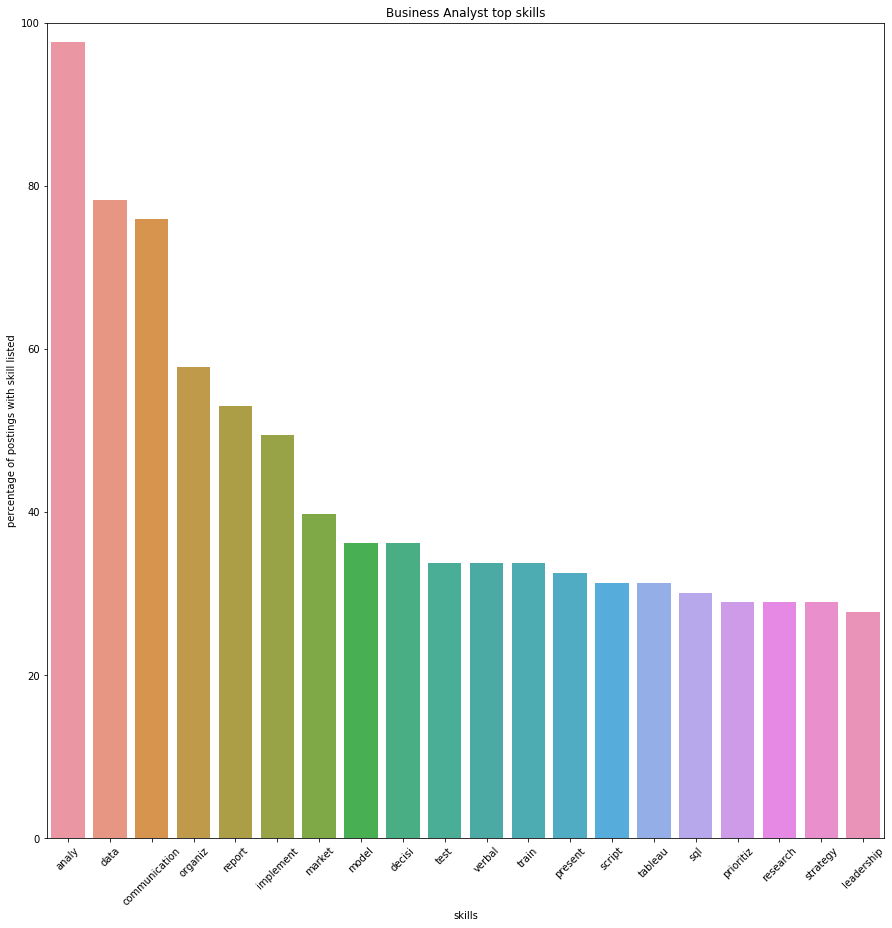

In [1765]:
df_ba = df_perc.loc['business_analyst'].sort_values(ascending=False).head(20)
df_ba = df_ba.reset_index()

print(df_ba)
a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=45);
sns.barplot(x='index', y='business_analyst', ax=ax, data=df_ba);
plt.title('Business Analyst top skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

### Data Scientist

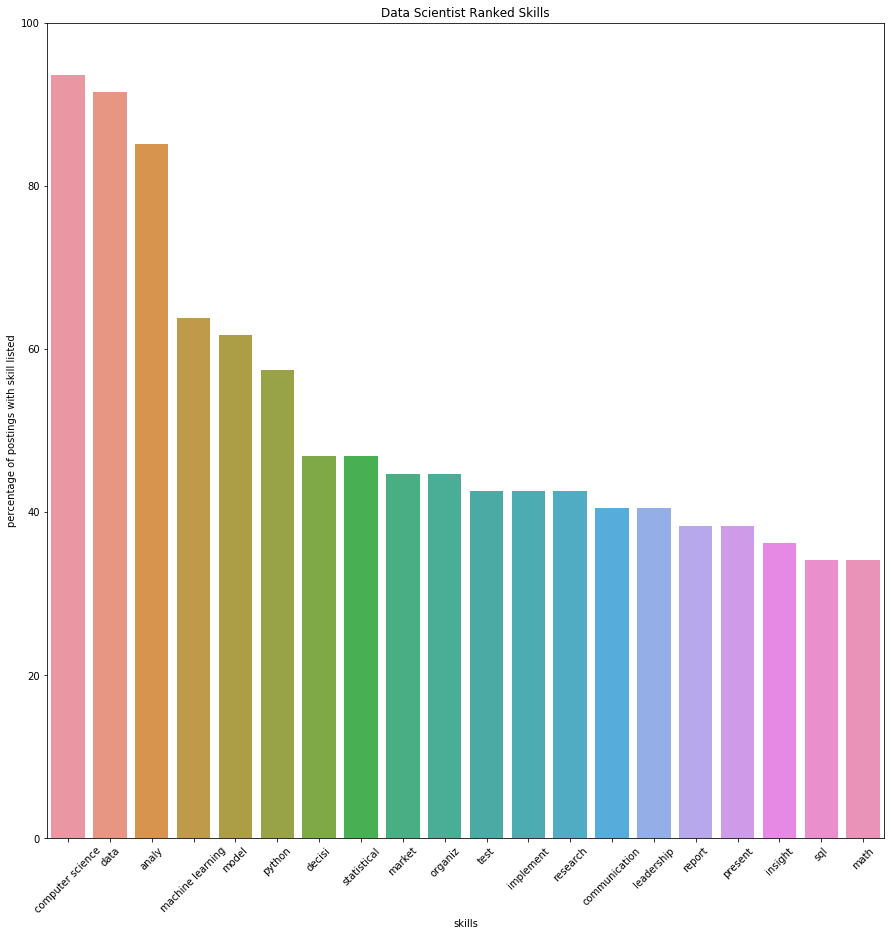

In [1766]:
df_ds = df_perc.loc['data_scientist'].sort_values(ascending=False).head(20)
df_ds = df_ds.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='data_scientist', ax=ax, data=df_ds)
plt.xticks(rotation=45);
plt.title('Data Scientist Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

### Customer Success

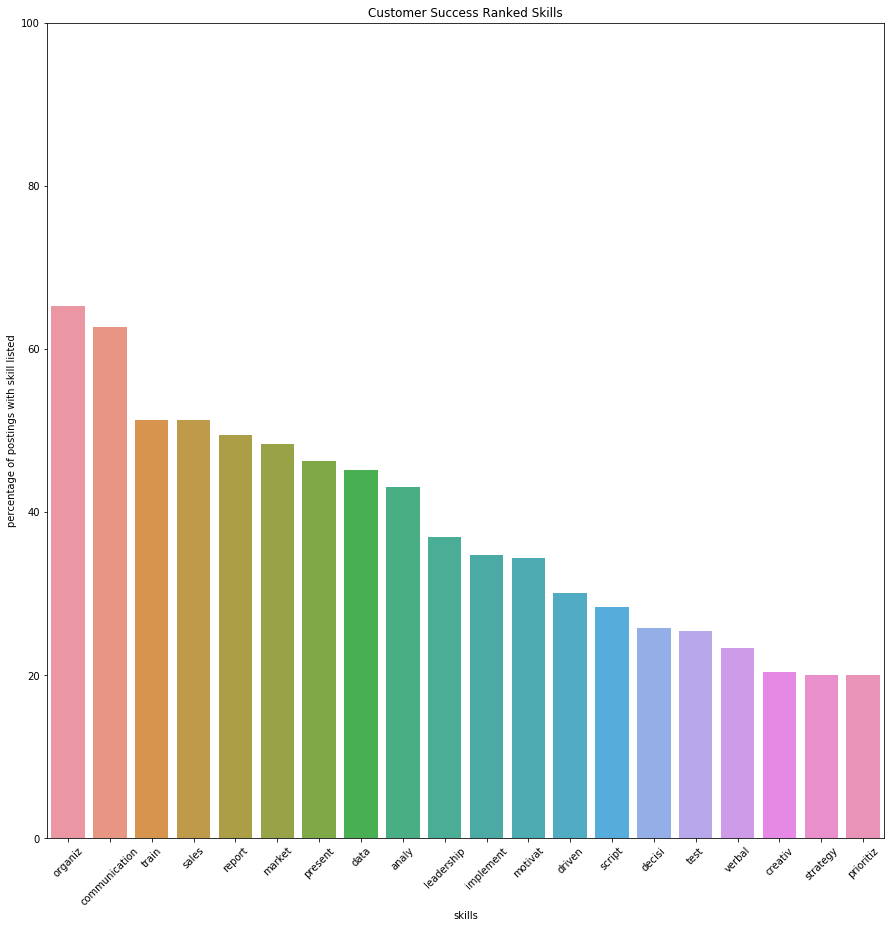

In [1767]:
df_cs = df_perc.loc['customer_success'].sort_values(ascending=False).head(20)
df_cs = df_cs.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='customer_success', ax=ax, data=df_cs)
plt.xticks(rotation=45);
plt.title('Customer Success Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

### Software Engineer

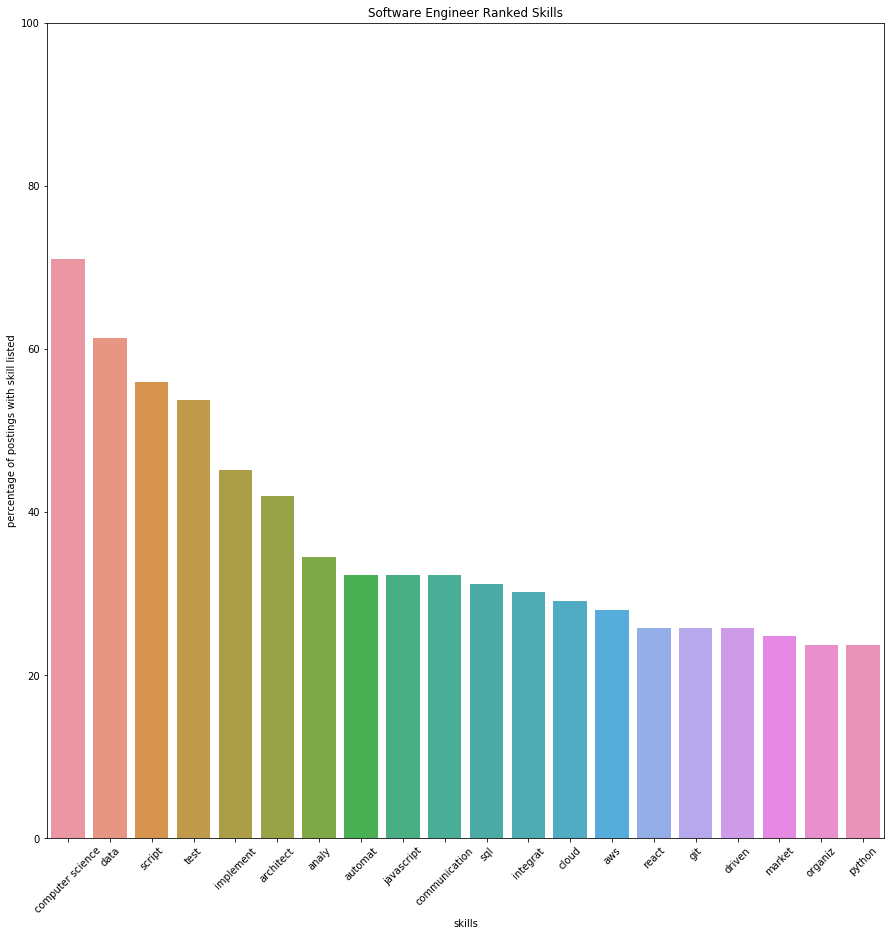

In [1768]:
df_se = df_perc.loc['software_engineer'].sort_values(ascending=False).head(20)
df_se = df_se.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='software_engineer', ax=ax, data=df_se)
plt.xticks(rotation=45);
plt.title('Software Engineer Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

### Solutions Architect

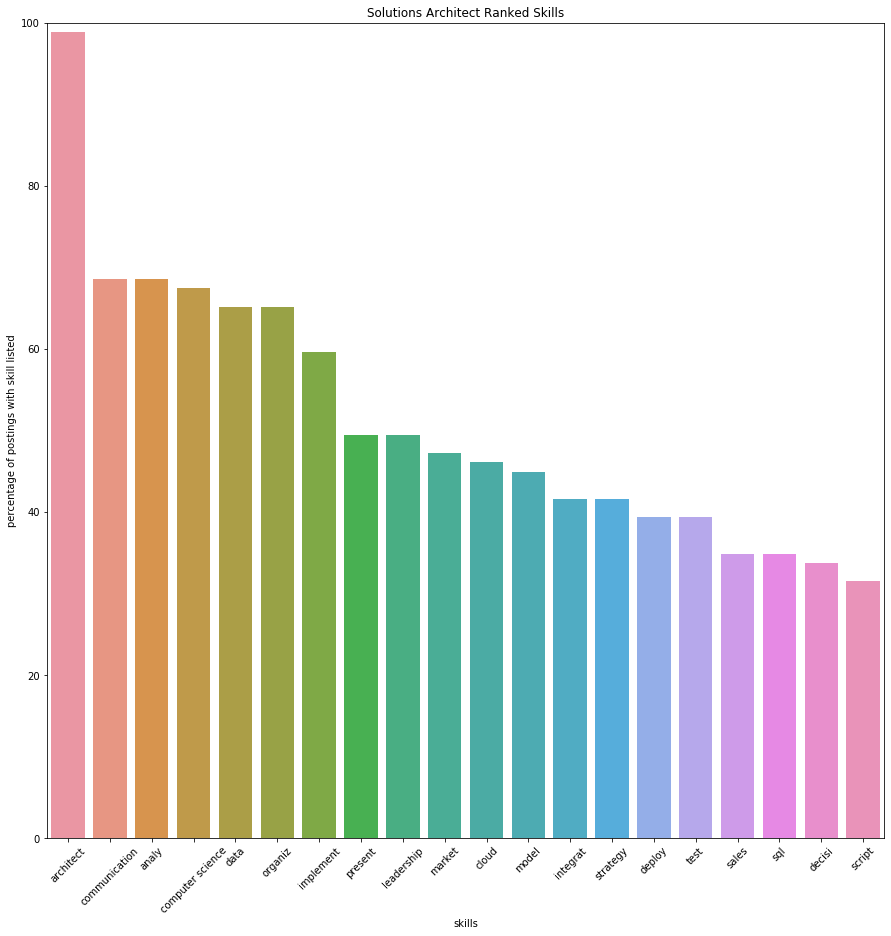

In [1769]:

df_sa = df_perc.loc['solutions_architect'].sort_values(ascending=False).head(20)
df_sa = df_sa.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='solutions_architect', ax=ax, data=df_sa)
plt.xticks(rotation=45);
plt.title('Solutions Architect Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

### Developer

               index  developer
0   computer science  78.980892
1               data  62.420382
2             script  56.050955
3               test  53.503185
4      communication  50.955414
5          implement  49.044586
6              analy  42.038217
7          architect  40.764331
8         javascript  38.853503
9                git  36.942675
10             cloud  36.305732
11            deploy  34.394904
12               aws  33.757962
13           automat  33.757962
14               sql  33.121019
15            python  33.121019
16          integrat  32.484076
17           jenkins  30.573248
18           organiz  29.299363
19             react  27.388535


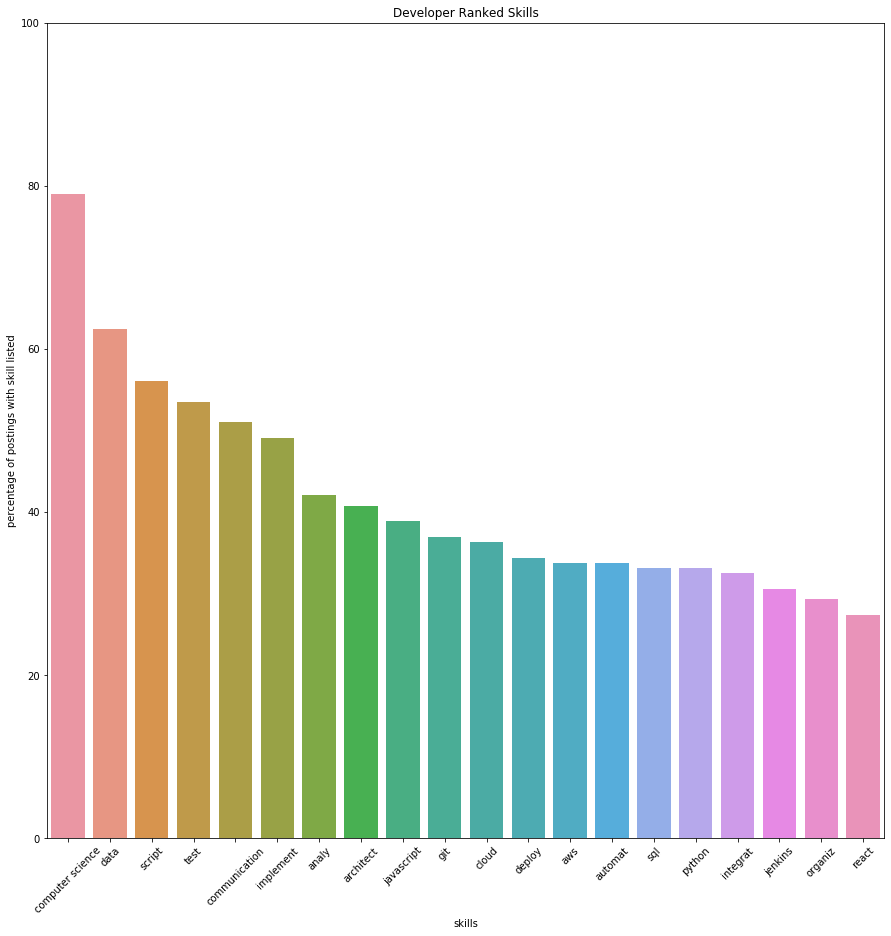

In [1770]:
df_dev = df_perc.loc['developer'].sort_values(ascending=False).head(20)
df_dev = df_dev.reset_index()

print(df_dev)
a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='developer', ax=ax, data=df_dev)
plt.xticks(rotation=45);
plt.title('Developer Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

### Account Executive

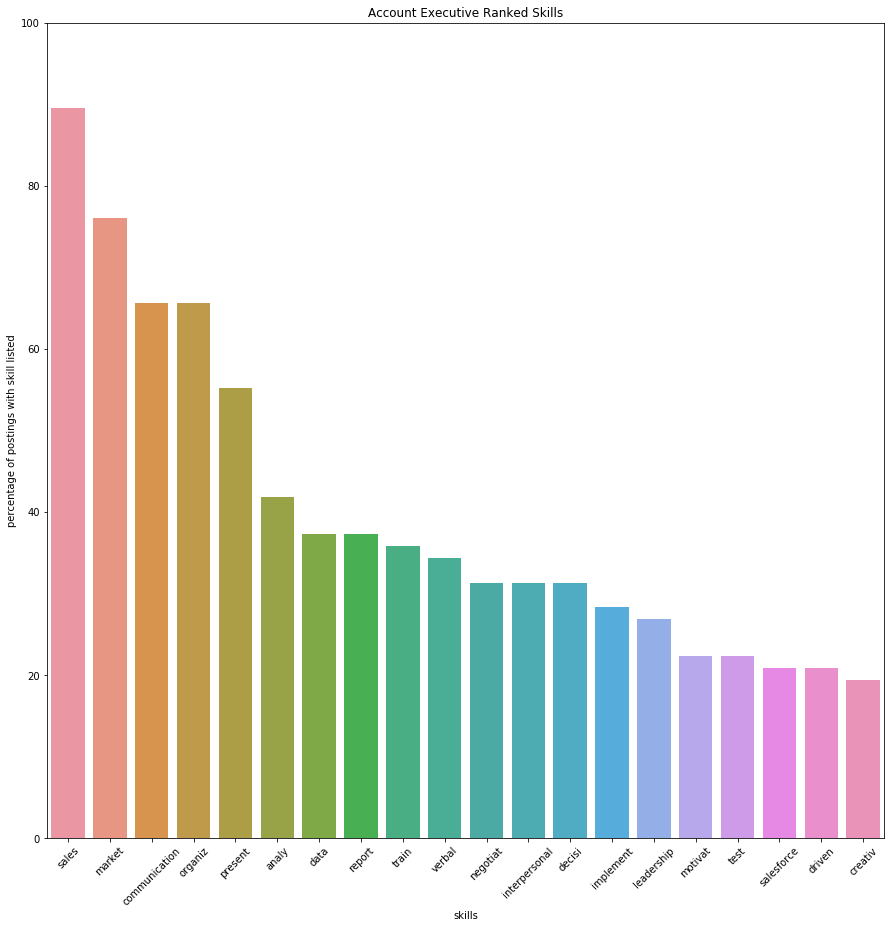

In [1771]:
df_ae = df_perc.loc['account_executive'].sort_values(ascending=False).head(20)
df_ae = df_ae.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='account_executive', ax=ax, data=df_ae)
plt.xticks(rotation=45);
plt.title('Account Executive Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

### Human Resources

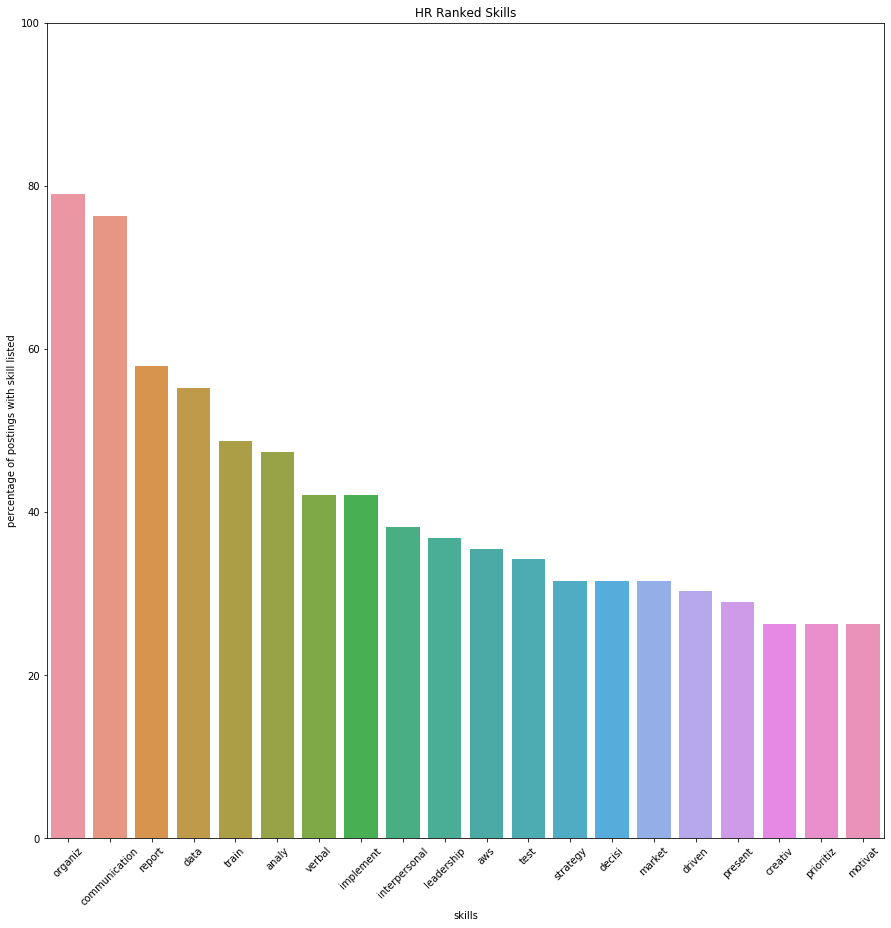

In [1772]:
df_hr = df_perc.loc['human_resources'].sort_values(ascending=False).head(20)
df_hr = df_hr.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='human_resources', ax=ax, data=df_hr)
plt.xticks(rotation=45);
plt.title('HR Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

### DATA ENGINEER

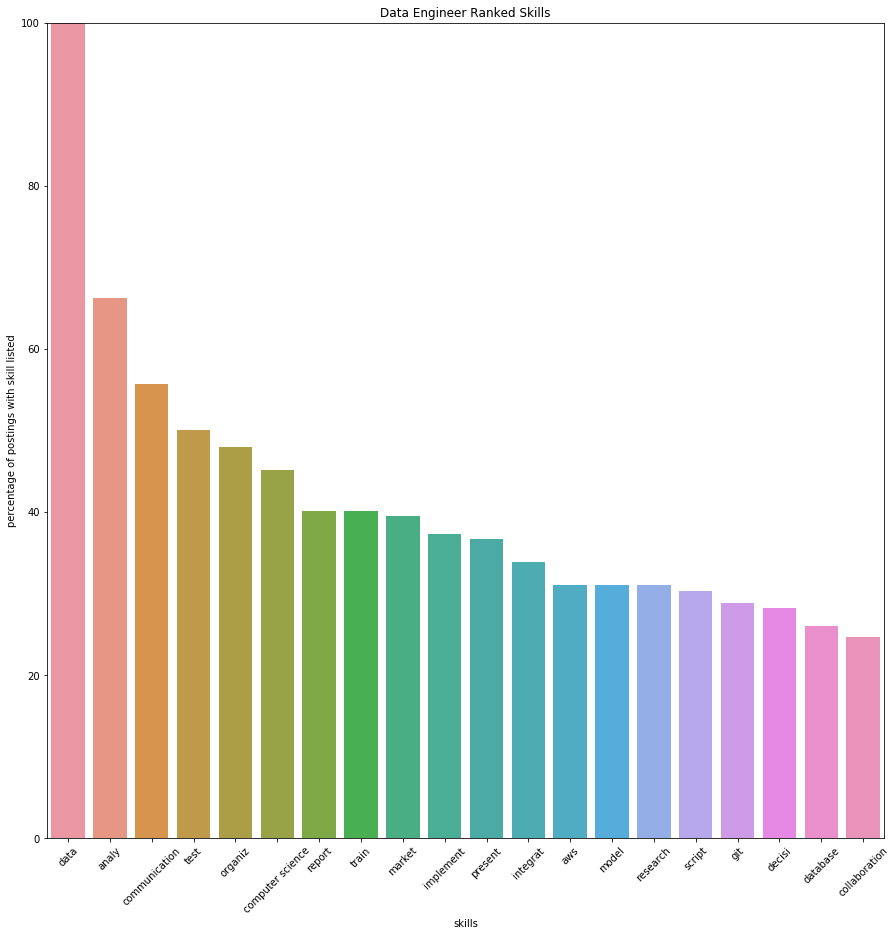

In [1773]:
df_de = df_perc.loc['data_engineer'].sort_values(ascending=False).head(20)
df_de = df_de.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='data_engineer', ax=ax, data=df_de)
plt.xticks(rotation=45);
plt.title('Data Engineer Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

### CONSULTANT

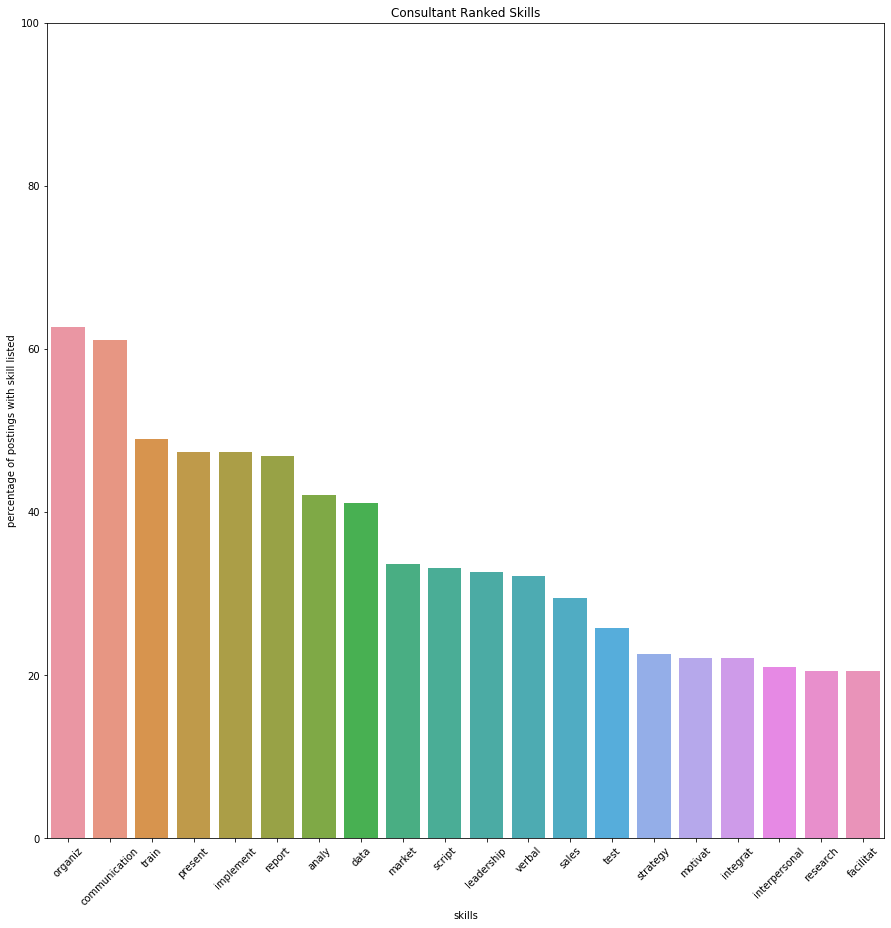

In [1774]:
df_c = df_perc.loc['consultant'].sort_values(ascending=False).head(20)
df_c = df_c.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='consultant', ax=ax, data=df_c)
plt.xticks(rotation=45);
plt.title('Consultant Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

In [1617]:
df_2.to_csv('Test_2.csv')

## ML RECOMMENDATION SYSTEM

,R,Excel,AI,Go,sql,nosql,python,airflow,terminal,java,...,network,time management,motivat,critical thinking,story telling,verbal,listen,organiz,prioritiz,interpersonal
712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
716,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
606,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
607,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [1722]:
df.iloc[:, 4:]

,R,Excel,AI,Go,CS,sql,nosql,python,airflow,terminal,...,network,time management,motivat,critical thinking,story telling,verbal,listen,organiz,prioritiz,interpersonal
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1640,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1641,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1642,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [1723]:
X = df.iloc[:, 4:]
y = df['role']

In [1724]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.30,
                                                        random_state=14)

### Nearest Neighbors

In [1725]:
neigh = NearestNeighbors(n_neighbors=5, radius=0.4)
neigh.fit(X)

NearestNeighbors(radius=0.4)

In [1726]:
neigh.kneighbors(test_data, 5, return_distance=False)

array([[1123, 1329,  368, 1275, 1617],
       [ 442,  360,  462,  687,  415],
       [ 409, 1136,  699,   81,  689],
       [ 280,  336,   62, 1270,   10],
       [ 689, 1590,   81,  409,  699]])

### Random Forest

In [1727]:
# Instantiate
rf = RandomForestClassifier()

# Fit
rf.fit(X_train,y_train)

# Predict
rf_preds = rf.predict(X_test)

# Score
print(rf.score(X_test, y_test))

0.048582995951417005


### KNN

In [1728]:
scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])

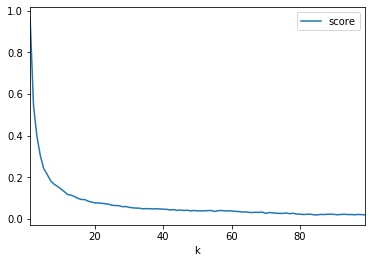

In [1729]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

In [1730]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X,y)
pred = knn.predict(X)
score = float(sum(pred == y)) / len(y)
score

0.15632603406326034

### LogRegression

In [1731]:
# LOG REGRESSION
clf = LogisticRegression(random_state=14)
clf.fit(X_train, y_train)
lr_preds = clf.predict(X_test)
lr_proba = clf.predict_proba(X_test)
clf.score(X_test, y_test)

0.05263157894736842

### SVM

In [1632]:
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)

SVC()

In [1732]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.predict(X_test)

array(['Maintenance Mechanic Mobile Equipment Operator - Rodeo Refinery',
       'Business Analyst', 'Software Engineer - Backend',
       'Program Manager', 'Project Manager', 'Project Manager',
       'Software Engineer', 'Account Manager',
       'Senior Administrative Associate',
       'Senior Implementation Consultant – ServiceNow & HR Service Delivery (HRSD)',
       'Senior Software Engineer (Tech Lead)', 'Account Manager',
       'Associate Marketing Manager', 'iPSC Scientist, Discovery Biology',
       'Account Manager', 'Software Engineer', 'Account Manager',
       'Data Scientist', 'Solutions Engineer', 'Data Scientist',
       'Software Architect, Backend', 'Account Manager',
       'Senior Software Engineer', 'Account Manager',
       'Senior Project Manager', 'Account Manager', 'Software Engineer',
       'Software Engineer', 'Multi-Site Leasing Sales Consultant',
       'Solutions Engineer', 'Software Engineer', 'Account Manager',
       'Customer Success Manager', 'Ac

### PEARSON RECOMMENDER SYSTEM

In [1733]:
pearsoncorr = df_2.corr(method='pearson').abs()
sol = (pearsoncorr.where(np.triu(np.ones(pearsoncorr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

In [1734]:
sol.sort_values(ascending=False).head(60)

sklearn           matlab        1.000000
java              javascript    0.997939
javascript        css           0.995825
java              css           0.995158
jenkins           ruby          0.994662
java              ci/cd         0.990342
                  ruby          0.989137
javascript        ci/cd         0.987576
css               ci/cd         0.987523
java              jenkins       0.986490
node              angular       0.986356
javascript        ruby          0.985878
train             report        0.985170
docker            postgres      0.985011
train             organiz       0.984440
kafka             docker        0.984297
jenkins           javascript    0.983813
javascript        spring        0.983768
motivation        motivat       0.983626
node              ruby          0.983358
jenkins           css           0.982852
ruby              css           0.982844
java              spring        0.982612
git               test          0.982178
jenkins         

### INPUT TEST DATA

In [1735]:
test_data = pd.read_csv('./TestMatrix.csv')

In [1736]:
test_data.drop('job', axis=1,inplace=True)

In [1737]:
test_data= test_data.fillna(0)

In [1738]:
list(set(test_data)-set(X))

['information']

In [1739]:
test_data.shape

(5, 160)

In [1740]:
X.shape

(1644, 160)

### ML Tests

In [1741]:
# KNN TEST
pred_test = knn.predict(test_data)
proba_test = knn.predict_proba(test_data)
print(pred_test, proba_test)

['2021 Wells Fargo CIB Sales & Trading Summer Analyst Program'
 'RN Supervisor' 'Android Developer' 'Software Engineer'
 'Android Developer'] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [1742]:
# RANDOM FOREST TEST
# Predict
rf_preds = rf.predict(test_data)
rf_proba = rf.predict_proba(test_data)

print(rf_preds, rf_proba)

['Data Science Manager' 'Dental Practice Manager' 'Partner Engineer'
 'Software Engineer' 'Business Analyst'] [[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.01 0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]


In [1743]:
# Log Regression
lr_preds = clf.predict(test_data)
lr_proba = clf.predict_proba(test_data)

print(lr_preds, lr_proba)

['Data Science Manager' 'RN Supervisor' 'Software Engineer'
 'Full Stack Engineer' 'Software Engineer'] [[3.43208842e-05 2.37010377e-03 3.07205612e-04 ... 7.26009091e-05
  3.28261077e-04 5.36029176e-05]
 [5.79171719e-04 1.48915739e-03 4.12596488e-04 ... 6.10605876e-04
  8.47757447e-04 1.53735046e-03]
 [5.64391886e-04 6.75973737e-04 1.57949568e-03 ... 3.53062823e-03
  1.22533858e-03 2.36269593e-03]
 [3.29318532e-04 7.79292132e-04 6.93240412e-04 ... 1.30354522e-03
  7.98784680e-04 1.67400552e-03]
 [4.57845537e-04 6.60170516e-04 1.82660911e-03 ... 1.71145845e-03
  1.39797557e-03 2.23834927e-03]]


In [1667]:
# SVM
svm_preds = clf_svm.predict(test_data)
# svm_proba = clf_svm.predict_proba(test_data)

print(svm_preds)

['Senior Software Engineer' 'Software Engineer' 'Software Engineer'
 'Software Engineer' 'Software Engineer']


In [1744]:
gnb_preds = gnb.predict(test_data)
gnb_proba = gnb.predict_proba(test_data)

print(gnb_preds, gnb_proba)

['Data Scientist' 'Senior Software Engineer' 'Full Stack Engineer'
 'Software Engineer' 'Solutions Engineer'] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Nearest Neighbors Recommender

In [1745]:
# Create a pivot matrix
job_features_df = df.pivot_table(index=['job','role'], values=X, aggfunc=np.sum).fillna(0)
job_features_df.head()

AI  CS  Excel  Go  \
job               role                                                       
account_executive Account Coordinator, Customer Success   0   0      0   0   
                  Account Executive                       0   0      0   0   
                  Account Executive - Jacksonville, FL    0   0      0   0   
                  Account Executive Healthcare Sales      0   0      0   0   
                  Account Executive, Mid-Market           0   0      0   0   

                                                         R   airflow  \
job               role                                                 
account_executive Account Coordinator, Customer Success   0        0   
                  Account Executive                       0        0   
                  Account Executive - Jacksonville, FL    0        0   
                  Account Executive Healthcare Sales      0        0   
                  Account Executive, Mid-Market           0        0   

                                                         algorithms  analy  \
job               role                                                       
account_executive Account Coordinator, Customer Success           0      1   
                  Account Executive                               0      1   
                  Account Executive - Jacksonville, FL            0      1   
                  Account Executive Healthcare Sales              0      0   
                  Account Executive, Mid-Market                   0      0   

                                                         angular  apis  ...  \
job               role                                                  ...   
account_executive Account Coordinator, Customer Success        0     0  ...   
                  Account Executive                            0     0  ...   
                  Account Executive - Jacksonville, FL         0     0  ...   
                  Account Executive Healthcare Sales           0     0  ...   
                  Account Executive, Mid-Market                0     0  ...   

                                                         trend analysis  \
job               role                                                    
account_executive Account Coordinator, Customer Success               0   
                  Account Executive                                   0   
                  Account Executive - Jacksonville, FL                0   
                  Account Executive Healthcare Sales                  0   
                  Account Executive, Mid-Market                       0   

                                                         typescript  unix  \
job               role                                                      
account_executive Account Coordinator, Customer Success           0     0   
                  Account Executive                               0     0   
                  Account Executive - Jacksonville, FL            0     0   
                  Account Executive Healthcare Sales              0     0   
                  Account Executive, Mid-Market                   0     0   

                                                         verbal  visualiz  \
job               role                                                      
account_executive Account Coordinator, Customer Success       1         0   
                  Account Executive                           2         0   
                  Account Executive - Jacksonville, FL        1         0   
                  Account Executive Healthcare Sales          0         0   
                  Account Executive, Mid-Market               0         0   

                                                         vue  web design  \
job               role                                                     
account_executive Account Coordinator, Customer Success    0           0   
                  Account Executive                        0          

In [1746]:
job_features_df

AI  CS  \
job                role                                                         
account_executive  Account Coordinator, Customer Success                0   0   
                   Account Executive                                    0   0   
                   Account Executive - Jacksonville, FL                 0   0   
                   Account Executive Healthcare Sales                   0   0   
                   Account Executive, Mid-Market                        0   0   
...                                                                    ..  ..   
solutions_engineer Vulcan Cyber is looking for an experienced Sale...   0   0   
                   Warehouse Operations Manager                         0   0   
                   Web Systems Engineer 5                               0   0   
                   Workday HCM Developer                                0   0   
                   eCom Data Engineer                                   0   0   

                                                                       Excel  \
job                role                                                        
account_executive  Account Coordinator, Customer Success                   0   
                   Account Executive                                       0   
                   Account Executive - Jacksonville, FL                    0   
                   Account Executive Healthcare Sales                      0   
                   Account Executive, Mid-Market                           0   
...                                                                      ...   
solutions_engineer Vulcan Cyber is looking for an experienced Sale...      0   
                   Warehouse Operations Manager                            0   
                   Web Systems Engineer 5                                  1   
                   Workday HCM Developer                                   0   
                   eCom Data Engineer                                      0   

                                                                       Go  R   \
job                role                                                         
account_executive  Account Coordinator, Customer Success                0   0   
                   Account Executive                                    0   0   
                   Account Executive - Jacksonville, FL                 0   0   
                   Account Executive Healthcare Sales                   0   0   
                   Account Executive, Mid-Market                        0   0   
...                                                                    ..  ..   
solutions_engineer Vulcan Cyber is looking for an experienced Sale...   0   0   
                   Warehouse Operations Manager                         0   0   
                   Web Systems Engineer 5                               0   0   
                   Workday HCM Developer                                0   0   
                   eCom Data Engineer                                   0   0   

                                                                       airflow  \
job                role                                                          
account_executive  Account Coordinator, Customer Success                     0   
                   Account Executive                                         0   
                   Account Executive - Jacksonville, FL                      0   
                   Account Executive Healthcare Sales                        0   
                   Account Executive, Mid-Market                             0   
...                                                                        ...   
solutions_engineer Vulcan Cyber is looking for an experienced Sale...        0   
                   Warehouse Operations Manager                              0   
                   Web Systems Engineer 5                                    0   
                   W

In [1747]:
job_features_df_matrix = csr_matrix(job_features_df.values)

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(job_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [1748]:
job_features_df.shape

(1520, 160)

In [1749]:
test_data.shape

(5, 160)

In [1750]:
test_data.iloc[[2]]

,R,Excel,AI,Go,CS,sql,nosql,python,airflow,terminal,...,network,time management,motivat,critical thinking,story telling,verbal,listen,organiz,prioritiz,interpersonal
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1763]:
distance, indices = model_knn.kneighbors(test_data.iloc[[3]], n_neighbors=6)

In [1764]:
for i in range(0,len(distance.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(test_data.index[2]))
    else:
        print('{0}: {1}, distance {2}:'.format(i, job_features_df.index[indices.flatten()[i]], distance.flatten()[i]))

Recommendations for 2:

1: ('solutions_engineer', 'Principal UI Engineer'), distance 0.6491767922771883:
2: ('solutions_architect', 'Superintendent'), distance 0.6533123773592318:
3: ('business_analyst', 'Graduate Business Analyst'), distance 0.6603168897566213:
4: ('product_manager', 'Senior Technical Product Marketing Manager'), distance 0.667043954091854:
5: ('solutions_architect', 'MS Dynamics Solution Architect'), distance 0.6722393316718467:
